# Descriptive Statistics

Goal: Better understand our data through the lens of descriptive statistics.

This includes viewing and understanding:
* Measures of Central Tendency (Mean, Median, and Mode)
* Measures of Spread (Range, Interquartile Range, Variance, Standard Deviation)

## 1. Import Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt


## 2. Load the Dataset

In [2]:
df = pd.read_csv("data/NY-House-Dataset.csv")

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4801 entries, 0 to 4800
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   BROKERTITLE                  4801 non-null   object 
 1   TYPE                         4801 non-null   object 
 2   PRICE                        4801 non-null   int64  
 3   BEDS                         4801 non-null   int64  
 4   BATH                         4801 non-null   float64
 5   PROPERTYSQFT                 4801 non-null   float64
 6   ADDRESS                      4801 non-null   object 
 7   STATE                        4801 non-null   object 
 8   MAIN_ADDRESS                 4801 non-null   object 
 9   ADMINISTRATIVE_AREA_LEVEL_2  4801 non-null   object 
 10  LOCALITY                     4801 non-null   object 
 11  SUBLOCALITY                  4801 non-null   object 
 12  STREET_NAME                  4801 non-null   object 
 13  LONG_NAME         

## 3. Measures of Central Tendency

The mean and median only make sense on quantiative data

### Mean

In [5]:
numeric = df.select_dtypes("number")
numeric.mean()

PRICE           2.356940e+06
BEDS            3.356801e+00
BATH            2.373861e+00
PROPERTYSQFT    2.184208e+03
LATITUDE        4.071423e+01
LONGITUDE      -7.394160e+01
dtype: float64

In [6]:
# Get the mean for a single collumn
df["PRICE"].mean()

2356940.17100604

### Median

In [7]:
numeric.median()

PRICE           825000.000000
BEDS                 3.000000
BATH                 2.000000
PROPERTYSQFT      2184.207862
LATITUDE            40.726749
LONGITUDE          -73.949189
dtype: float64

### Mode
If there is more than 1 mode for a certain column, the remaining columns will be filled in with NaN (Not a Number)

In [8]:
df.mode()

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
0,Brokered by COMPASS,Co-op for sale,699000.0,3.0,2.0,2184.207862,2619 Shore Pkwy,"Brooklyn, NY 11235","2619 Shore PkwyBrooklyn, NY 11223",United States,New York,New York,Manhattan,2,"61-20 Grand Central Pkwy, Forest Hills, NY 113...",40.756476,-73.970927
1,NaN,NaN,NaN,NaN,NaN,NaN,856 Washington Ave Apt 6C,NaN,"856 Washington Ave Apt 6CBrooklyn, NY 11238",NaN,NaN,NaN,NaN,NaN,NaN,NaN,-73.721201


## 4. Measures of Spread

### Range

PRICE           2.147481e+09
BEDS            4.900000e+01
BATH            5.000000e+01
PROPERTYSQFT    6.530500e+04
LATITUDE        4.131833e-01
LONGITUDE       5.505832e-01
dtype: float64

### Quartiles

The best way to work with quartiles is to visualize them

#### *Creating a Boxplot*
Box plots show us the min and max values, each quarter, the median, and any outliers.

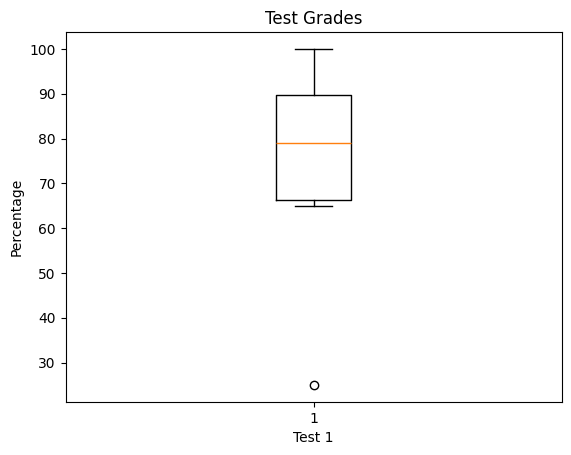

In [11]:
# Series of temp data
test_grades = pd.Series([65, 70, 100, 92, 25, 83, 76, 82, 65, 96])


# Create a boxplot
plt.boxplot(test_grades)
plt.title("Test Grades")
plt.xlabel("Test 1")
plt.ylabel("Percentage")
plt.show()

### Variance

In [12]:
# Get the variance of all numeric columns
numeric.var()

PRICE           9.831515e+14
BEDS            6.772042e+00
BATH            3.790660e+00
PROPERTYSQFT    5.650799e+06
LATITUDE        7.687005e-03
LONGITUDE       1.021767e-02
dtype: float64

### Standard Deviation

In [13]:
numeric.std()

PRICE           3.135525e+07
BEDS            2.602315e+00
BATH            1.946962e+00
PROPERTYSQFT    2.377141e+03
LATITUDE        8.767557e-02
LONGITUDE       1.010825e-01
dtype: float64

## 5. Summary Statistics
The faster way to do all of this

In [20]:
df.describe()

summary_stats = df.describe()
summary_stats.loc[["min", "max"], :]

,PRICE,BEDS,BATH,PROPERTYSQFT,LATITUDE,LONGITUDE
min,2.494000e+03,1.0,0.0,230.0,40.499546,-74.253033
max,2.147484e+09,50.0,50.0,65535.0,40.912729,-73.702450


## 6. Histograms

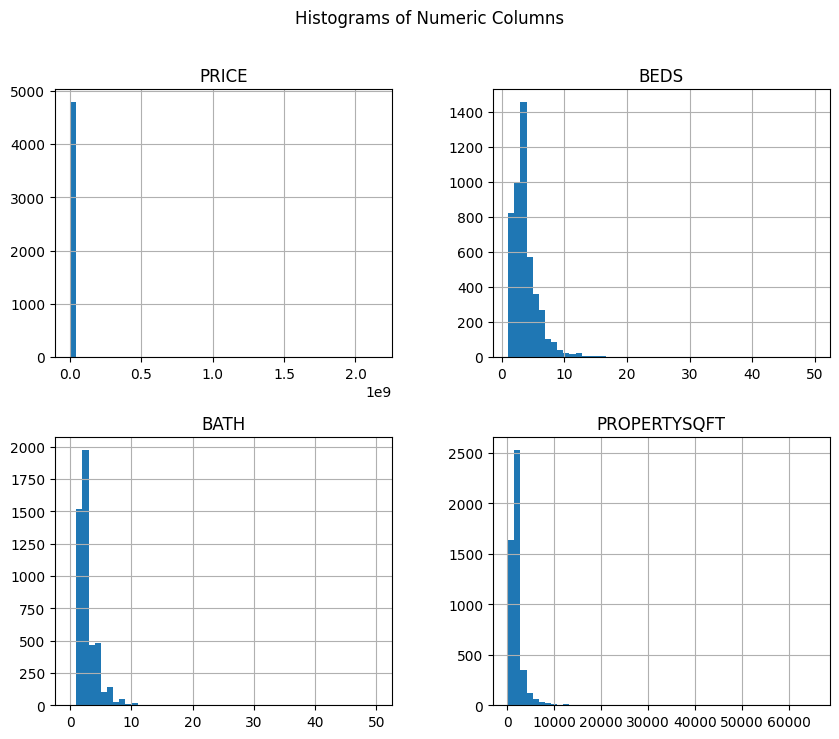

In [24]:
# For every numeric column
# df.hist(figsize=(10, 8))

# FOr only certain colmuns
df[["PRICE", "BEDS", "BATH", "PROPERTYSQFT"]].hist(figsize=(10, 8), bins=50)

plt.suptitle("Histograms of Numeric Columns")

plt.show()

# Homework

1. Get all the descriptive statistics for the PRICE column when grouped by
SUBLOCALITY. You will have to use the groupby() and describe() functions we learned

In [31]:
df = pd.read_csv("data/NY-House-Dataset.csv")
df.groupby("SUBLOCALITY")[["PRICE"]].describe()

PRICE                                                    \
                   count          mean           std        min        25%   
SUBLOCALITY                                                                  
Bronx County       307.0  1.020866e+06  1.195025e+06    69900.0   584000.0   
Brooklyn           464.0  8.646435e+05  1.232096e+06     5800.0   329000.0   
Brooklyn Heights     1.0  6.250000e+05           NaN   625000.0   625000.0   
Coney Island         3.0  5.113333e+05  9.481737e+04   429000.0   459500.0   
Dumbo                1.0  5.799000e+06           NaN  5799000.0  5799000.0   
East Bronx           1.0  2.650000e+05           NaN   265000.0   265000.0   
Flushing             4.0  4.760000e+05  1.794120e+05   299000.0   350750.0   
Fort Hamilton        1.0  5.990000e+05           NaN   599000.0   599000.0   
Jackson Heights      1.0  9.850000e+05           NaN   985000.0   985000.0   
Kings County       727.0  1.795465e+06  2.169195e+06   199999.0   799000.0   
Manhattan           21.0  3.609905e+06  3.928910e+06   315000.0  1050000.0   
New York          1016.0  2.534033e+06  4.940018e+06     2494.0   600000.0   
New York County    286.0  1.019120e+07  1.477885e+07    69000.0  2500000.0   
Queens             555.0  4.437331e+05  2.611871e+05   100000.0   266500.0   
Queens County      684.0  1.135774e+06  9.513956e+05   160000.0   699000.0   
Rego Park            1.0  2.150000e+05           NaN   215000.0   215000.0   
Richmond County    480.0  5.427598e+06  9.798090e+07    90000.0   599000.0   
Riverdale            4.0  3.470000e+05  9.780252e+04   235000.0   280000.0   
Snyder Avenue        1.0  6.500000e+05           NaN   650000.0   650000.0   
Staten Island       59.0  4.475819e+05  3.297199e+05   109500.0   249999.0   
The Bronx          184.0  3.366162e+05  2.778350e+05    49500.0   173750.0   

                                                       
                        50%         75%           max  
SUBLOCALITY                                            
Bronx County       795000.0   1037500.0  1.400000e+07  
Brooklyn           554000.0    908000.0  1.499500e+07  
Brooklyn Heights   625000.0    625000.0  6.250000e+05  
Coney Island       490000.0    552500.0  6.150000e+05  
Dumbo             5799000.0   5799000.0  5.799000e+06  
East Bronx         265000.0    265000.0  2.650000e+05  
Flushing           453000.0    578250.0  6.990000e+05  
Fort Hamilton      599000.0    599000.0  5.990000e+05  
Jackson Heights    985000.0    985000.0  9.850000e+05  
Kings County      1249000.0   1999499.5  3.150000e+07  
Manhattan         2795000.0   3995000.0  1.699500e+07  
New York          1025000.0   2380000.0  6.000000e+07  
New York County   6497500.0  12995000.0  1.950000e+08  
Queens             375000.0    568500.0  1.850000e+06  
Queens County      948500.0   1302222.0  1.500000e+07  
Rego Park          215000.0    215000.0  2.150000e+05  
Richmond County    750000.0    999000.0  2.147484e+09  
Riverdale          362000.0    429000.0  4.290000e+05  
Snyder Avenue      650000.0    650000.0  6.500000e+05  
Staten Island      350000.0    452500.0  1.799000e+06  
The Bronx          279900.0    367475.0  1.995000e+06

2. Get all rows where the SUBLOCALITY is equal to The Bronx and save it into a new
dataframe named bronx_prop. You will use this dataframe for the remaining questions

In [34]:
bronx_prop = df.query("SUBLOCALITY == 'The Bronx'")
bronx_prop

,BROKERTITLE,TYPE,PRICE,BEDS,BATH,PROPERTYSQFT,ADDRESS,STATE,MAIN_ADDRESS,ADMINISTRATIVE_AREA_LEVEL_2,LOCALITY,SUBLOCALITY,STREET_NAME,LONG_NAME,FORMATTED_ADDRESS,LATITUDE,LONGITUDE
10,Brokered by Engel & Volkers Americas,Co-op for sale,375000,2,1.0,850.000000,800 Grand Concourse Apt 2JS,"Bronx, NY 10451","800 Grand Concourse Apt 2JSBronx, NY 10451",New York,Bronx County,The Bronx,Concourse Village,800,"800 Grand Concourse #2j, Bronx, NY 10451, USA",40.824870,-73.922983
18,Brokered by Coldwell Banker Realty,Co-op for sale,350000,1,1.0,700.000000,5800 Arlington Ave Apt 21A,"Bronx, NY 10471","5800 Arlington Ave Apt 21ABronx, NY 10471",New York,Bronx County,The Bronx,North Riverdale,5800,"5800 Arlington Ave Apt 21s, Bronx, NY 10471, USA",40.907370,-73.906558
43,Brokered by Brown Harris Stevens,Co-op for sale,199900,1,1.0,2184.207862,828 Gerard Ave Apt 5F,"Bronx, NY 10451","828 Gerard Ave Apt 5FBronx, NY 10451",New York,Bronx County,The Bronx,Concourse,828,"828 Gerard Ave #5f, Bronx, NY 10451, USA",40.826035,-73.925663
96,Brokered by Douglas Elliman - 3544 Johnson Ave,Co-op for sale,1295000,4,2.0,1995.000000,2501 Palisade Ave Apt H2,"Bronx, NY 10463","2501 Palisade Ave Apt H2Bronx, NY 10463",New York,Bronx County,The Bronx,Spuyten Duyvil,2501,"2501 Palisade Ave #2, Bronx, NY 10463, USA",40.880987,-73.922434
146,Brokered by RE MAX Boutique Realty,Co-op for sale,90000,1,1.0,450.000000,1383 Plimpton Ave Apt 1C,"Bronx, NY 10452","1383 Plimpton Ave Apt 1CBronx, NY 10452",New York,Bronx County,The Bronx,Highbridge,1383,"1383 Plimpton Ave #1c, Bronx, NY 10452, USA",40.842371,-73.923444
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4591,Brokered by Corcoran Westside Columbus,Co-op for sale,280000,2,1.0,1050.000000,3000 Valentine Ave Apt 3B,"Bronx, NY 10458","3000 Valentine Ave Apt 3BBronx, NY 10458",New York,Bronx County,The Bronx,West Bronx,3000,"3000 Valentine Ave #3b, Bronx, NY 10458, USA",40.872414,-73.885223
4662,Brokered by COMPASS,Co-op for sale,375000,2,1.0,2184.207862,5900 Arlington Ave Apt 10H,"Bronx, NY 10471","5900 Arlington Ave Apt 10HBronx, NY 10471",New York,Bronx County,The Bronx,North Riverdale,5900,"5900 Arlington Ave #10h, Bronx, NY 10471, USA",40.909252,-73.905421
4692,Brokered by Mp Power Realty,Co-op for sale,167999,1,1.0,2184.207862,3121 Middletown Rd Apt 6B,"Bronx, NY 10461","3121 Middletown Rd Apt 6BBronx, NY 10461",New York,Bronx County,The Bronx,Pelham Bay,3121,"3121 Middletown Rd #6b, Bronx, NY 10461, USA",40.845596,-73.826422
4731,Brokered by Brown Harris Stevens,Co-op for sale,309000,2,1.0,2184.207862,3935 Blackstone Ave Apt 3F,"Bronx, NY 10471","3935 Blackstone Ave Apt 3FBronx, NY 10471",New York,Bronx County,The Bronx,Riverdale,3935,"3935 Blackstone Ave #3f, Bronx, NY 10471, USA",40.890384,-73.911788


3. Find the mean, median, and mode PRICE for all properties in bronx_prop.
a. In a markdown cell tell me what you can learn about the data from just these
values.

In [44]:
bronx_prop = bronx_prop.select_dtypes("number")
mean = df["PRICE"].mean()
median = df["PRICE"].median()
mode = df["PRICE"].mode()



You can learn about the difference between the different types of centering values

4. Determine the range of prices for the bronx properties

In [46]:
range = bronx_prop.max() - bronx_prop.min()

5. Create a boxplot for the PRICE column.
a. In a new markdown cell, tell me everything that you can learn from this boxplot -
min, max, quartiles, etc

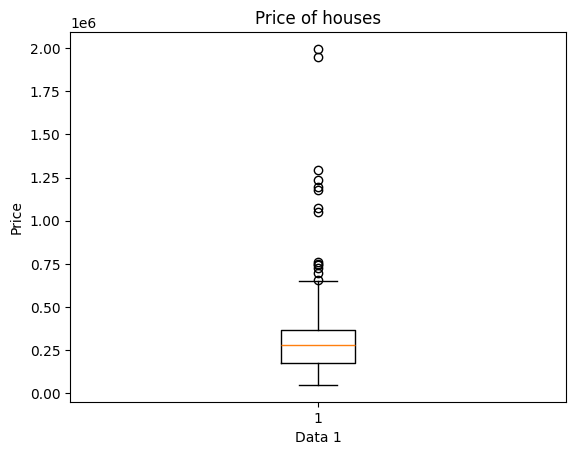

In [48]:
plt.boxplot(bronx_prop["PRICE"])
plt.title("Price of houses")
plt.xlabel("Data 1")
plt.ylabel("Price")
plt.show()

You can learn the range, the values of the quartiles which you can uses for the variance and standard deviation

6. Create a histogram for the PRICE column with at least 50 bins.

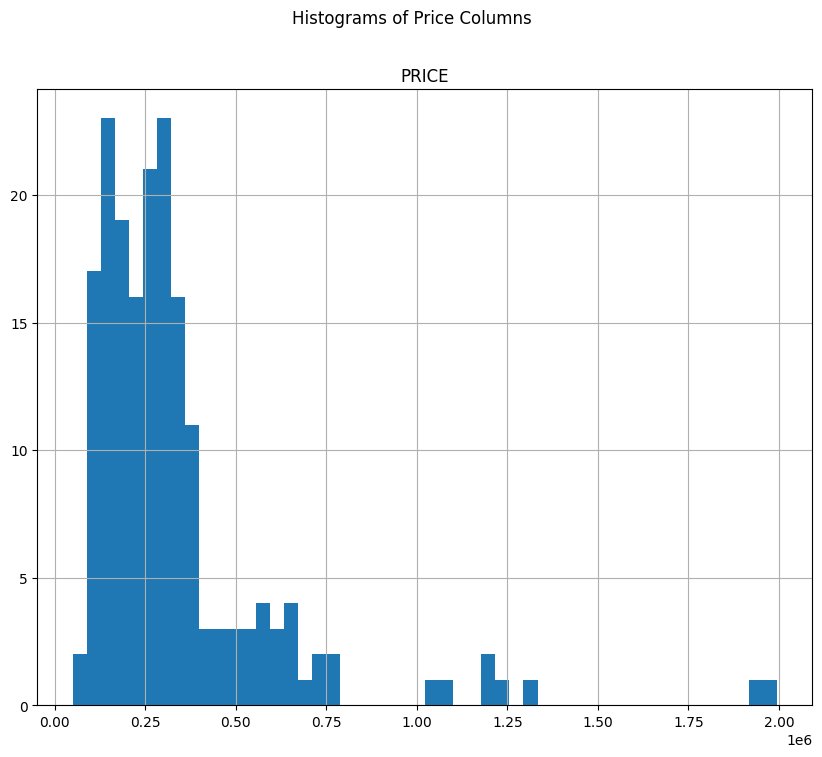

In [51]:
bronx_prop[["PRICE"]].hist(figsize=(10, 8), bins=50)

plt.suptitle("Histograms of Price Columns")

plt.show()

7. Get the standard deviation for the PRICE column

In [52]:
bronx_prop["PRICE"].std()

277834.99600401166

8. In a new markdown cell, summarize everything you’ve now discovered about the prices
of The Bronx properties

I have discovered that the deviation between house properties in the bronx is not that big when not considering the outsiders 